In [2]:
import jax.numpy as jnp
from jax import vmap

In [3]:
# Problem setup
T = 1.0  # final time
L = 5  # length of the domain
c = 80  # advection speed
n_t = 200  # number of time steps
n_x = 128  # number of spatial points

In [4]:
t_star = jnp.linspace(0, T, n_t)
x_star = jnp.linspace(0, L, n_x)

In [5]:
u_exact_fn = lambda t, x: jnp.sin(x - c * t)

In [6]:
u_exact_fn(1, 4), u_exact_fn(2, 5), u_exact_fn(3, 6)

(Array(-0.56610763, dtype=float32, weak_type=True),
 Array(0.873312, dtype=float32, weak_type=True),
 Array(-0.99881667, dtype=float32, weak_type=True))

In [7]:
u_exact_fn(jnp.array([1, 2, 3]), jnp.array([4, 5, 6]))

Array([-0.56610763,  0.873312  , -0.99881667], dtype=float32)

In [8]:
u_exact_fn(jnp.array([1, 1, 1]), jnp.array([4, 5, 6]))

Array([-0.56610763,  0.38778165,  0.9851463 ], dtype=float32)

In [9]:
u_exact_fn_vmap = vmap(u_exact_fn, (None, 0))
u_exact_fn_vmap(1, jnp.array([4, 5, 6]))

Array([-0.56610763,  0.38778165,  0.9851463 ], dtype=float32)

In [10]:
u_exact_fn_vmap(2, jnp.array([4, 5, 6]))

Array([0.8817846 , 0.873312  , 0.06192034], dtype=float32)

In [11]:
u_exact_fn_vmap(3, jnp.array([4, 5, 6]))

Array([ 0.3714321 , -0.5805867 , -0.99881667], dtype=float32)

In [12]:
u_exact_fn_vmap_vmap = vmap(vmap(u_exact_fn, (None, 0)), (0, None))
u_exact_fn_vmap_vmap(jnp.array([1, 2, 3]), jnp.array([4, 5, 6]))

Array([[-0.56610763,  0.38778165,  0.9851463 ],
       [ 0.8817846 ,  0.873312  ,  0.06192034],
       [ 0.3714321 , -0.5805867 , -0.99881667]], dtype=float32)

In [13]:
u_ref = vmap(vmap(u_exact_fn, (None, 0)), (0, None))(t_star, x_star)

In [14]:
jnp.sin(x_star[5] - c * t_star[5])

Array(-0.97076386, dtype=float32)

In [15]:
jnp.mod(x_star[5] - c * t_star[5], L)

Array(3.1868, dtype=float32)

In [16]:
jnp.sin(jnp.mod(x_star[5] - c * t_star[5], L))

Array(-0.04519195, dtype=float32)

In [17]:
u_exact_fn_L = lambda t, x: jnp.sin(jnp.mod(x - c * t, L))

In [18]:
u_ref_L = vmap(vmap(u_exact_fn_L, (None, 0)), (0, None))(t_star, x_star)

In [19]:
u_ref.shape

(200, 128)

In [20]:
import matplotlib.pyplot as plt

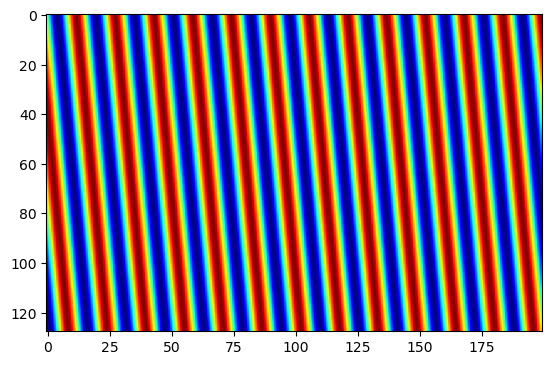

In [21]:
plt.imshow(u_ref.T, cmap="jet")
plt.show()

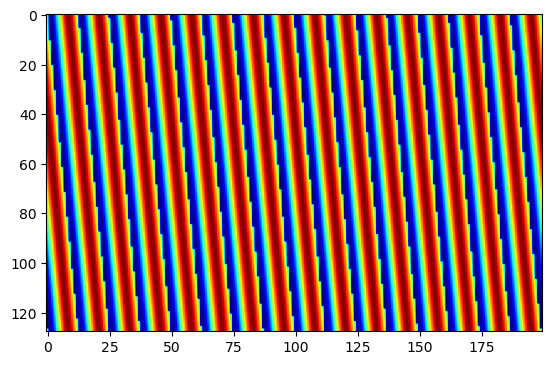

In [22]:
plt.imshow(u_ref_L.T, cmap="jet")
plt.show()

In [23]:
TT, XX = jnp.meshgrid(t_star, x_star, indexing='ij')

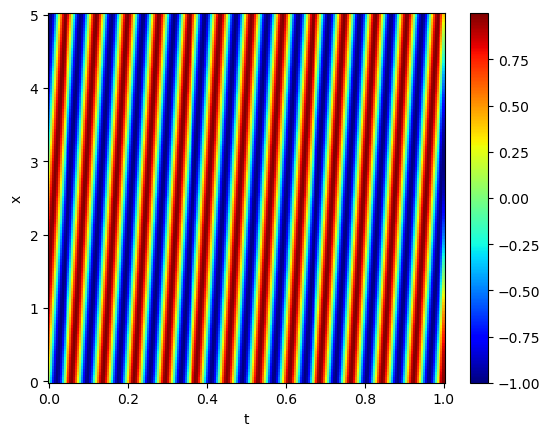

In [24]:
plt.pcolor(TT, XX, u_ref, cmap='jet')
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()
plt.show()

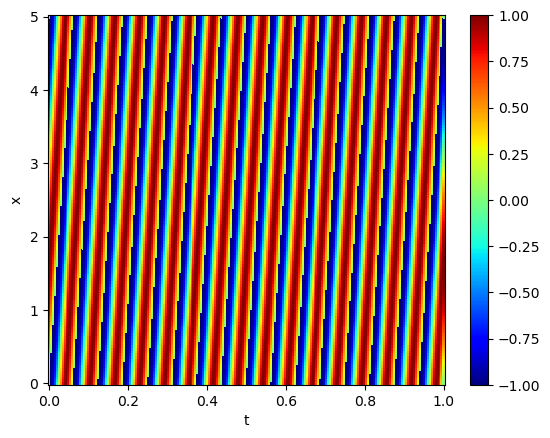

In [25]:
plt.pcolor(TT, XX, u_ref_L, cmap='jet')
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()
plt.show()

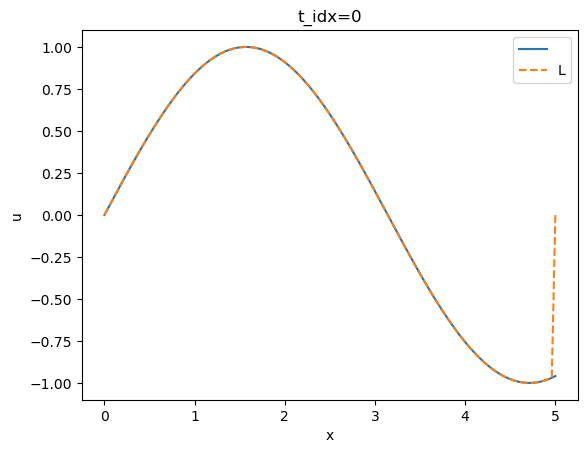

In [26]:
t_idx = 0

plt.plot(x_star, u_ref[t_idx, :], label=' ')
plt.plot(x_star, u_ref_L[t_idx, :], '--', label='L')
plt.title(f't_idx={t_idx}')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

In [27]:
from ipywidgets import interact
import ipywidgets as widgets

In [28]:
def g(x):
    return (x)

In [29]:
interact(g, x=widgets.IntSlider(min=-10, max=30, step=1, value=10))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.g(x)>

In [30]:
def f(t_idx):
    plt.plot(x_star, u_ref[t_idx, :], label=' ')
    plt.plot(x_star, u_ref_L[t_idx, :], '--', label='L')
    plt.title(f't_idx={t_idx}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.show()

In [31]:
interact(f, t_idx=widgets.IntSlider(min=0, max=n_t-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t_idx', max=199), Output()), _dom_classes=('widget-inter…

<function __main__.f(t_idx)>

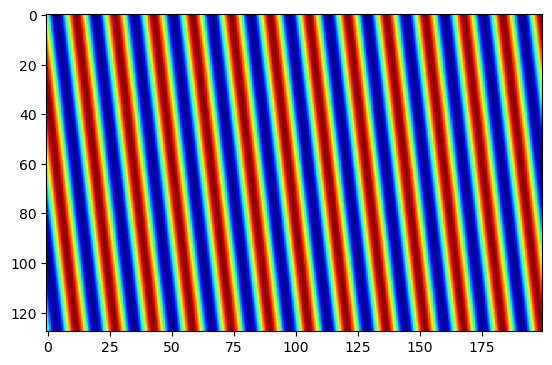

In [32]:
# Problem setup
T = 1.0  # final time
L = 2 * jnp.pi  # length of the domain
c = 80  # advection speed
n_t = 200  # number of time steps
n_x = 128  # number of spatial points

def get_dataset(T=2.0, L=2 * jnp.pi, c=50, n_t=200, n_x=128):
    t_star = jnp.linspace(0, T, n_t)
    x_star = jnp.linspace(0, L, n_x)

    u_exact_fn = lambda t, x: jnp.sin(jnp.mod(x - c * t, L))

    u_exact = vmap(vmap(u_exact_fn, (None, 0)), (0, None))(t_star, x_star)

    return u_exact, t_star, x_star

u_ref, t_star, x_star = get_dataset(T, L, c, n_t, n_x)

plt.imshow(u_ref.T, cmap="jet")